# 1 Step Adam Moulton 
This notebook implements the 1 step Adams Moulton method for three different population intial value problems.

# Formula
The general 1 step Adams-Moulton method for the first order differential equation
$$ y^{'} = f(t,y) $$
numerical approximates $y$ the at time point $t_i$ as $w_i$
with the  formula:
$$ w_{i+1}=w_i+\frac{h}{2}\big[f(t_{i+1},w_{i+1})+f(t_{i},w_{i})],$$
for $i=0,...,N-1$, where 

and $h$ is the stepsize.

To illustrate the method we will apply it to three intial value problems:
## 1. Linear 
Consider the linear population Differential Equation
$$ y^{'}=0.1y, \ \ (2000 \leq t \leq 2020), $$
with the initial condition,
$$y(2000)=6.$$

## 2. Non-Linear Population Equation 
Consider the non-linear population Differential Equation
$$ y^{'}=0.2y-0.01y^2, \ \ (2000 \leq t \leq 2020), $$
with the initial condition,
$$y(2000)=6.$$

## 3. Non-Linear Population Equation with an oscillation 
Consider the non-linear population Differential Equation with an oscillation 
$$ y^{'}=0.2y-0.01y^2+\sin(2\pi t), \ \ (2000 \leq t \leq 2020), $$
with the initial condition,
$$y(2000)=6.$$

#### Setting up Libraries

In [11]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")

In [12]:
from IPython.display import HTML

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

In [13]:
 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Discrete Interval
The continuous time $a\leq t \leq b $ is discretised into $N$ points seperated by a constant stepsize
$$ h=\frac{b-a}{N}.$$
Here the interval is $2000\leq t \leq 2020,$ 
$$ h=\frac{2020-2000}{200}=0.1.$$
This gives the 201 discrete points:
$$ t_0=2000, \ t_1=2000.1, \ ... t_{200}=2020. $$
This is generalised to 
$$ t_i=2000+i0.1, \ \ \ i=0,1,...,200.$$
The plot below shows the discrete time steps:

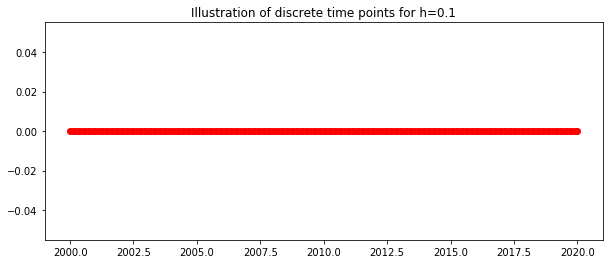

201

In [14]:
### DISCRETE TIME
N=200
t_end=2020.0
t_start=2000.0
h=((t_end-t_start)/N)
t=np.arange(t_start,t_end+h/2,h)

## PLOTS TIME
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red')
plt.title('Illustration of discrete time points for h=%s'%(h))
plt.show()
len(t)

# 1. Linear Population Equation
## Exact Solution 
The linear population equation
$$ y^{'}=0.1y, \ \ (2000 \leq t \leq 2020), $$
with the initial condition,
$$y(2000)=6.$$
has a known exact (analytic) solution
$$ y(t)=6e^{0.1(t-2000)}. $$

## Specific 1 step Adams Moulton
The specific 1 step Adams Moulton for the linear population equation is:

$$w_{i+1}=w_{i}+\frac{h}{2}\big[0.1w_{i+1}+0.1w_i\big] $$
where
$$f(t,y)=0.1y,$$

In [15]:
## THIS IS THE RIGHT HANDSIDE OF THE LINEAR POPULATION DIFFERENTIAL 
## EQUATION
def linfun(t,w):
    ftw=0.1*w
    return ftw

re-arranging,
$$ \big(1-\frac{h}{2}(0.1)\big)w_{i+1}=w_i+\frac{h}{2}\big[0.1w_i\big], $$
$$ w_{i+1}=\frac{w_i+\frac{h}{2}\big[0.1w_i\big]}{\big(1-\frac{h}{2}(0.1)\big)} $$




In [16]:
### INSERT METHOD HERE
w=np.zeros(N+1) # a list of 2000+1 zeros
w[0]=6 # INITIAL CONDITION
for i in range(0,N):
    w[i+1]=(w[i]+h/2*(linfun(t[i],w[i])))/(1-0.1*h/2)


## Plotting Results

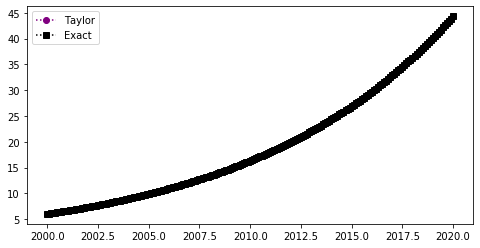

In [17]:
## PLOTTING METHOD
y=6*np.exp(0.1*(t-2000)) # EXACT SOLUTION
fig = plt.figure(figsize=(8,4))
plt.plot(t,w,'o:',color='purple',label='Taylor')
plt.plot(t,y,'s:',color='black',label='Exact')
plt.legend(loc='best')
plt.show()

## Table
The table below shows the time, the numerical approximation, $w$,  the exact solution, $y$, and the exact error $|y(t_i)-w_i|$ for the linear population equation:

In [18]:
table = ListTable()
table.append(['time', ' Adams (w)',  'Exact (y)','Exact Error'])
for i in range (0,10):
    table.append([round(t[i],2),  round(w[i],9), round(y[i],9),np.abs(round(y[i]-w[i],10))])
    
table

time,Adams (w),Exact (y),Exact Error
2000.0,6.0,6.0,0.0
2000.1,6.060301508,6.060301003,5.05e-07
2000.2,6.12120906,6.12120804,1.0202e-06
2000.3,6.182728749,6.182727204,1.5457e-06
2000.4,6.244866727,6.244864645,2.0817e-06
2000.5,6.307629206,6.307626578,2.6282e-06
2000.6,6.371022465,6.371019279,3.1856e-06
2000.7,6.435052841,6.435049088,3.7538e-06
2000.8,6.499726739,6.499722406,4.3332e-06
2000.9,6.565050626,6.565045702,4.9239e-06


## 2. Non-Linear Population Equation 
$$ y^{'}=0.2y-0.01y^2, \ \ (2000 \leq t \leq 2020), $$
with the initial condition,
$$y(2000)=6.$$
## Specific 1 step Adams-Moutlon method for the Non-Linear Population Equation
The specific Adams-Moulton difference equation for the non-linear population equations is:

$$w_{i+1}=w_{i}+\frac{h}{2}\big[ 0.2 w_{i+1}-0.01 w_{i+1}^2 
                                + 0.2 w_i-0.01 w_i^2\big] $$
re-arranging 
$$w_{i+1}-\frac{h}{2}\big( 0.2 w_{i+1}-0.01 w_{i+1}^2 \big)=w_{i}+\frac{h}{2}
                                \big[ 0.2 w_i-0.01 w_i^2\big] $$


for $i=0,...,199$, where $w_i$ is the numerical approximation of $y$ at time $t_i$, with step size $h$ and the initial condition
$$w_0=6.$$

PROBLEM WE CANNOT MOVE THE SQUARED (NON-LINEAR TERM) TO THE RIGHT HAND SIDE SO WE CAN SOLVE FOR w[i+1].


In [ ]:
def nonlinfun(t,w):
    ftw=0.2*w-0.01*w*w
    return ftw

In [ ]:
### INSERT METHOD HERE
w=np.zeros(N+1)
w[0]=6
w[1]=6.084 # FROM THE THE TAYLOR METHOD
for n in range(1,N):
    w[n+1]=w[n]+h/2

## Results
The plot below shows the numerical approximation, $w$ (circles) for the non-linear population equation:

In [ ]:
fig = plt.figure(figsize=(8,4))
plt.plot(t,w,'o:',color='purple',label='2 step Adams Method ')
plt.title('Non Linear Population Equation')
plt.legend(loc='best')
plt.xlabel('time (yrs)')
plt.ylabel('Population in billions')
plt.show()

## Table
The table below shows the time and the numerical approximation, $w$,  for the non-linear population equation:

In [ ]:
table = ListTable()
table.append(['time', '2 step Adams Moulton Population (w)'])
for i in range (0,10):
    table.append([round(t[i],2),  round(w[i],9)])
    
table

## 3. Non-Linear Population Equation with an oscilation 
$$ y^{'}=0.2y-0.01y^2+\sin(2\pi t), \ \ (2000 \leq t \leq 2020), $$
with the initial condition,
$$y(2000)=6.$$

## Specific 2 Step Adams Moulton for the Non-Linear Population Equation with an oscilation
To write the specific 

$$ w_{i+1}=w_{i}+\frac{0.1}{2} \big[ \big] $$
            
for $i=1,...,199$, where $w_i$ is the numerical approximation of $y$ at time $t_i$, with step size $h$ and the initial condition
$$w_0=6.$$ As $w_1$ is required for the method but unknown we will use the numerical solution of a one step method to approximate the value. Here, we use the 2nd order Runge Kutta approximation (see [Runge Kutta notebook](https://github.com/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2003%20-%20Runge%20Kutta/01_2nd%20Order%20Runge%20Kutta%20Population%20Equations.ipynb) )
$$w_1=6.11.$$

In [ ]:
def nonlin_oscfun(t,w):
    ftw=0.2*w-0.01*w*w+np.sin(2*np.math.pi*t)
    return ftw

In [ ]:
## INSERT METHOD HERE
w=np.zeros(N+1)
w[0]=6
w[1]=6.11
for n in range(1,N):
    w[n+1]=w[n]+h/2

## Results
The plot below shows the  numerical approximation, $w$ (circles) for the non-linear population equation:

In [ ]:
fig = plt.figure(figsize=(8,4))
plt.plot(t,w,'o:',color='purple',label='Adams-Moulton')
plt.title('Population Equation with seasonal oscilation')
plt.xlabel('time (yrs)')
plt.ylabel('Population in Billions')
plt.legend(loc='best')
plt.show()

## Table
The table below shows the time and the numerical approximation, $w$,  for the non-linear population equation:

In [ ]:
table = ListTable()
table.append(['time', 'Adams-Moulton (w)'])
for i in range (0,10):
    table.append([round(t[i],2),  round(w[i],9)])
    
table
